<a href="https://colab.research.google.com/github/K-3-LT/BA810/blob/main/Copy_of_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google Colab Notebook link:

# Homework 1 (Total 100 points)

#Homework 1

## Q1. Load and examine the `Auto.csv` dataset from the Blackboard course site. **(20 points total)**

  1. Should you drop any variable from regression analysis and why? (5 points)
  1. Which variables should be treated as numeric and which as categorical? Explain why. (5 points)

FYI column definitions (from https://cran.r-project.org/web/packages/ISLR/ISLR.pdf): 
* mpg: miles per gallon (The outcome, or y, variable)
* cylinders: Number of cylinders between 4 and 8
* displacement: Engine displacement (cu. inches)
* horsepower: Engine horsepower
* weight: Vehicle weight (lbs.)
* acceleration: Time to accelerate from 0 to 60 mph (sec.)
* year: Model year (modulo 100)
* origin: Origin of car (1. American, 2. European, 3. Japanese)
* name: Vehicle name


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive

# Load datasets
drive.mount('/content/drive')
data_folder = '/content/drive/MyDrive/BA810/Data/'  # Mount my google drive
auto = pd.read_csv(data_folder + 'Auto.csv')  # read auto.csv

# Display data info
auto.info()
auto.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# Transform data
auto['horsepower'] = auto['horsepower'].replace(['?'], 0.0)
auto[['horsepower']] = auto[['horsepower']].apply(pd.to_numeric)

## **Q1 Ans**
1. **Should you drop any variable from regression analysis and why? (5 points)**

1. **Which variables should be treated as numeric and which as categorical? Explain why. (5 points)**
* Numeric: mpg, displacement, horsepower, weight, accelaration
* Categorical: cylinders, year, origin

## Q2. Scatter and explore. **(20 points total)**
1. Plot all the pairwise scatter plots and histograms for the numeric features. (10 points)
1. Discuss two interesting relationships that you notice. (10 points)

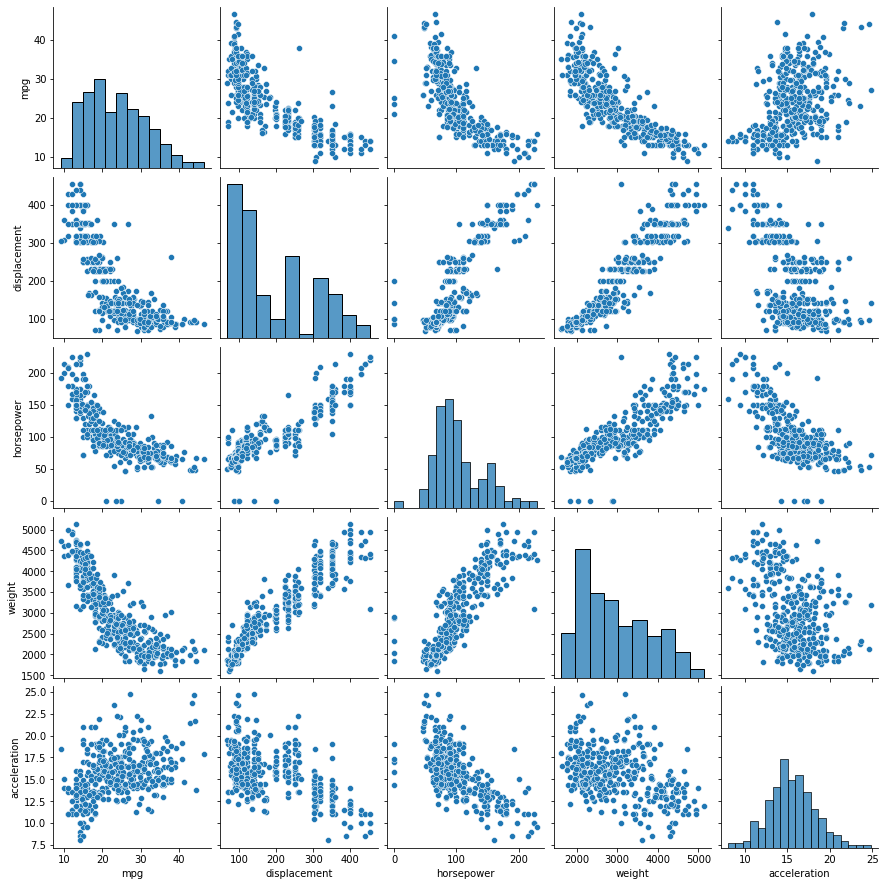

In [ ]:
sns.pairplot(auto, x_vars=['mpg', 'displacement', 'horsepower', 'weight', 'acceleration'], y_vars=['mpg', 'displacement', 'horsepower', 'weight', 'acceleration'])

## Q3. Compute the correlation matrix among the numeric variables. Discuss one interesting correlation. (5+5=**10 points total**)

In [ ]:
auto[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']].corr()

,mpg,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.804443,-0.761004,-0.831739,0.422297
displacement,-0.804443,1.000000,0.876741,0.933104,-0.544162
horsepower,-0.761004,0.876741,1.000000,0.845483,-0.670643
weight,-0.831739,0.933104,0.845483,1.000000,-0.419502
acceleration,0.422297,-0.544162,-0.670643,-0.419502,1.000000


## Q4. Use `statsmodels` to regress mpg on all other variables. Note you can tell `ols()` to treat a variable as categorical by enclosing the variable in `C()`. (10 points) **(15 points total)**
  1. Interpret the significant effects. (5 points)
  1. Which variables don't have a significant effect? Provide potential explanation for one surprising non-effect. (5 points)
  1. Discuss the difference in results when you treat `year` as a categorical vs a numeric variable. (5 points)

In [ ]:
# import statesmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

est = smf.ols('mpg ~ C(cylinders) + displacement + horsepower + weight +acceleration + C(year) + C(origin)', auto).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     116.5
Date:                Tue, 01 Nov 2022   Prob (F-statistic):          2.02e-152
Time:                        06:13:58   Log-Likelihood:                -970.48
No. Observations:                 397   AIC:                             1987.
Df Residuals:                     374   BIC:                             2079.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            29.1037      2.24

## Q5. From the above regression model in Q4, include two way interactions between a numeric and categorical variable in three different regression models (three separate models in total). Do any of them appear significant? Discuss the results. **(15 points total)**


## Q6. Measure the in-sample and out of sample $R^2$ of the model estimated in Q4.1 using 20% data for testing. **(10 points total)**

## Q7. Collaboration statement **(10 points total)**
Who did you discuss while answering this homework (whether to get or to provide help)? What questions/topics did you discuss? 

Note: No penalty for either side. While getting help in figuring out how to solve is OK, all answers should be produced by you. 

Sample answer: I discussed with Hazel for this homework. I needed her help with gradescope and as a sounding board for the reasonableness of this homework.